In [329]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


In [330]:
df = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv")
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0
5,0,2023-06-29 16:31:14,2023-06-29 16:29:06,1.0,0.00,99.0,N,225,256,Credit Card,0.0,1.507831,0.0,1.0,44.70,0.0,0.0
6,1,2023-06-30 12:54:57,2023-06-30 11:52:20,1.0,1.33,1.0,N,214,240,Cash,0.0,0.094334,0.0,1.0,18.20,2.5,0.0
7,1,2023-06-30 17:16:44,2023-06-30 17:40:34,1.0,0.45,1.0,N,176,227,Cash,2.5,0.727105,0.0,1.0,13.70,2.5,0.0
8,0,2023-06-30 21:52:44,2023-06-30 21:54:13,3.0,3.80,1.0,N,196,139,Credit Card,3.5,6.590745,0.0,1.0,35.60,2.5,0.0
9,1,2023-06-29 11:12:12,2023-06-29 09:39:24,1.0,2.50,1.0,N,138,196,Credit Card,0.0,6.091603,0.0,1.0,23.10,2.5,0.0


#### Using Dummy Regressor to understand whether data is correctly fetched and we are able to apply our model !!

In [331]:
# from sklearn.model_selection import train_test_split
# from sklearn.dummy import DummyRegressor


# dr = DummyRegressor(strategy='mean')

# dr.fit(xtr,ytr)


In [332]:
# xtest=pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")

# ypred = dr.predict(xtest)

In [333]:
# submission = pd.DataFrame(columns = ["ID","total_amount"])
# submission["ID"] = [i for i in range(1,len(ypred)+1)]
# submission["total_amount"] = ypred
# submission.to_csv('submission.csv',index=False)

### Exploratory Data Analysis

In [334]:
# Trying by dropping this column
# df = df.drop("store_and_fwd_flag",axis =1 )

In [335]:
# Converting to datetime

df['tpep_pickup_datetime']= pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']= pd.to_datetime(df['tpep_dropoff_datetime'])

In [336]:
# This code converts a column of datetime objects to numeric values. 

df['tpep_pickup_datetime']= df['tpep_pickup_datetime'].apply(lambda x: x.timestamp())
df['tpep_dropoff_datetime']= df['tpep_dropoff_datetime'].apply(lambda x: x.timestamp())

"""The above code converts the datetime object to numeric values by calculating the number of seconds.
The lambda function is converting each element of the column to a UNIX timestamp using the timestamp() method
of the datetime object.A UNIX timestamp is a way to represent a date and time as a single number,
representing the number of seconds that have elapsed since January 1, 1970, at 00:00:00 UTC  
"""
# Calculating duration between the two 

df['duration'] = (df['tpep_dropoff_datetime'])-(df["tpep_pickup_datetime"])
print(df['duration'])
media = df['duration'].median()
print(f'\nMedian Duration is : {media}')

0        -2736.0
1        -3806.0
2         3219.0
3         3412.0
4         1130.0
           ...  
174995   -1715.0
174996    3684.0
174997    4202.0
174998   -2302.0
174999    5279.0
Name: duration, Length: 175000, dtype: float64

Median Duration is : 988.0


332.0
72867


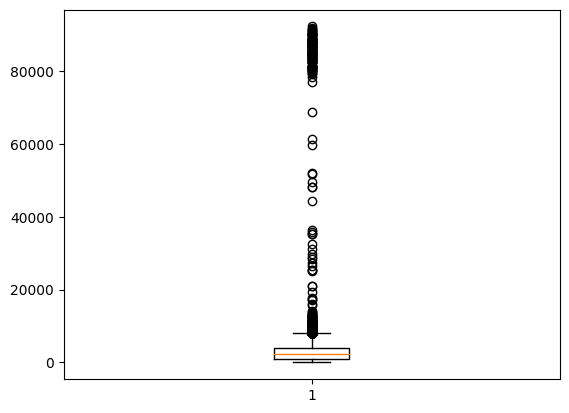

In [337]:
# Checking the possibility if pickup and dropoff time have been exchanged and how will it impact our duration

df_absolute = pd.DataFrame({'duration': abs(df['duration'])})

# Let's see the distribution and presence of outliers if any !
plt.boxplot(df_absolute['duration'])


# Checking at what percentile does the duration time actually starts to make sense since it cannot be 0.
print(np.percentile(df_absolute['duration'],8))

print(df['duration'][df['duration']<=np.percentile(df_absolute['duration'],8)].count())

# 8 percentile seems appropriate since it is set at 332 seconds which is a little bit more than 5 mins and can be set as a threshold. 



In [338]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,175000.0,7.283771e-01,0.445606,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
tpep_pickup_datetime,175000.0,1.688069e+09,60702.026098,1.687966e+09,1.688027e+09,1.688065e+09,1.688128e+09,1.688173e+09
tpep_dropoff_datetime,175000.0,1.688070e+09,60762.941127,1.687966e+09,1.688028e+09,1.688066e+09,1.688130e+09,1.688253e+09
passenger_count,168923.0,1.357678e+00,0.891283,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00
trip_distance,175000.0,5.145930e+00,394.971052,0.000000e+00,1.080000e+00,1.840000e+00,3.610000e+00,1.351821e+05
RatecodeID,168923.0,1.518307e+00,6.514678,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.900000e+01
PULocationID,175000.0,1.327103e+02,76.148799,1.000000e+00,6.700000e+01,1.330000e+02,1.990000e+02,2.640000e+02
DOLocationID,175000.0,1.327014e+02,76.192493,1.000000e+00,6.700000e+01,1.330000e+02,1.990000e+02,2.640000e+02
extra,175000.0,1.932143e+00,1.948497,-7.500000e+00,0.000000e+00,1.000000e+00,2.500000e+00,1.175000e+01
tip_amount,175000.0,6.127497e+00,4.610834,7.907626e-05,3.473321e+00,5.286217e+00,7.502746e+00,4.848762e+02


In [339]:
# Checking for negative values in the label
df.loc[df['total_amount']<0].sort_values(by = ['total_amount'], ascending = False)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
136567,1,1.687974e+09,1.687974e+09,1.0,1.41,2.0,N,247,190,Cash,0.0,4.539454,0.0,-1.0,-3.25,0.0,-1.75,11.0
5306,1,1.688085e+09,1.688082e+09,2.0,0.00,2.0,N,29,211,Cash,0.0,2.964741,0.0,-1.0,-4.00,-2.5,0.00,-2286.0
101003,1,1.688058e+09,1.688062e+09,1.0,2.93,1.0,N,228,259,Cash,0.0,4.635968,0.0,-1.0,-4.00,-2.5,0.00,3806.0
157988,1,1.687991e+09,1.687990e+09,1.0,3.86,1.0,N,151,76,Cash,0.0,0.129693,0.0,-1.0,-4.00,-2.5,0.00,-1220.0
36970,1,1.688161e+09,1.688160e+09,2.0,1.38,2.0,N,11,57,Cash,0.0,3.197745,0.0,-1.0,-4.00,-2.5,0.00,-973.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106910,1,1.688158e+09,1.688159e+09,1.0,0.00,5.0,N,131,84,unknown,0.0,3.522517,0.0,-1.0,-223.50,-2.5,0.00,481.0
29874,1,1.688002e+09,1.688009e+09,1.0,41.86,4.0,N,54,59,unknown,-1.0,0.332210,0.0,-1.0,-273.25,0.0,-1.75,7560.0
126651,1,1.688078e+09,1.688083e+09,1.0,51.47,5.0,N,76,260,Cash,0.0,3.578071,-29.3,-1.0,-305.30,0.0,0.00,5430.0
139496,1,1.688059e+09,1.688055e+09,3.0,0.00,5.0,N,96,62,UPI,0.0,1.894248,0.0,-1.0,-441.00,0.0,0.00,-4269.0


In [340]:
# There are a lot of negative values but along with it,many other features contain negative values which ultimately making the target values negative 
# but target value being exactly 0 doesn't make any sense
df = df.drop(df['total_amount'].loc[df['total_amount']==0])

In [341]:
# We earlier saw there are a lot of negative values which suggests that data was not recorded properly, lets see how many values are there 

print(f"The total number of values having negative duration time are : {df['duration'][df['duration']<=0].count()} \n")

# Out of 175000 values, 65693 are incorrectly recorded since duration between pickup and dropoff cannot be negative
# and since its approx ~35% values, we cannot drop it since it will lead to loss of information, so we can replace these values with 
# some measure of central tendency

# Let's replace these values 

median_duration = np.median(df['duration'][df['duration']>332]) # 332 seconds picked as threshold 
print(median_duration)

df['duration'][df['duration']<=332] = median_duration
df['duration'] = np.log(df['duration'])            # Trying to tackle outliers by transforming values

print(df['duration'])

The total number of values having negative duration time are : 65692 

2769.0
1         7.926242
2         8.076826
3         8.135054
4         7.029973
5         7.926242
            ...   
174995    7.926242
174996    8.211754
174997    8.343316
174998    7.926242
174999    8.571492
Name: duration, Length: 174999, dtype: float64


/tmp/ipykernel_32/2118358796.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'][df['duration']<=332] = median_duration


,count,mean,std,min,25%,50%,75%,max
VendorID,174999.0,7.283756e-01,0.445607,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
tpep_pickup_datetime,174999.0,1.688069e+09,60701.761208,1.687966e+09,1.688027e+09,1.688065e+09,1.688128e+09,1.688173e+09
tpep_dropoff_datetime,174999.0,1.688070e+09,60762.641594,1.687966e+09,1.688028e+09,1.688066e+09,1.688130e+09,1.688253e+09
passenger_count,168922.0,1.357680e+00,0.891285,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00
trip_distance,174999.0,5.145948e+00,394.972180,0.000000e+00,1.080000e+00,1.840000e+00,3.610000e+00,1.351821e+05
RatecodeID,168922.0,1.518310e+00,6.514697,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.900000e+01
PULocationID,174999.0,1.327104e+02,76.149010,1.000000e+00,6.700000e+01,1.330000e+02,1.990000e+02,2.640000e+02
DOLocationID,174999.0,1.327021e+02,76.192137,1.000000e+00,6.700000e+01,1.330000e+02,1.990000e+02,2.640000e+02
extra,174999.0,1.932140e+00,1.948502,-7.500000e+00,0.000000e+00,1.000000e+00,2.500000e+00,1.175000e+01
tip_amount,174999.0,6.127491e+00,4.610846,7.907626e-05,3.473310e+00,5.286188e+00,7.502778e+00,4.848762e+02


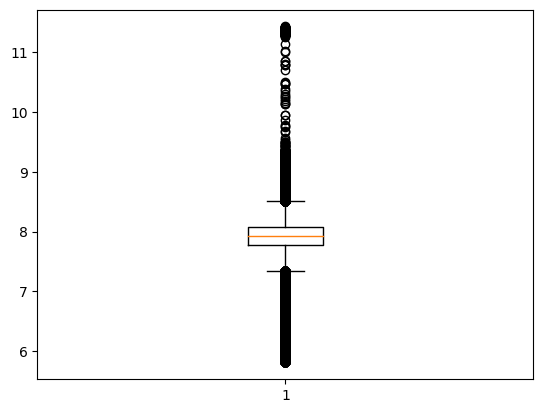

In [342]:
plt.boxplot(df['duration'])
df.describe().T

#### Clearly the transformation has brought down the outliers in this column

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174999 entries, 1 to 174999
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               174999 non-null  int64  
 1   tpep_pickup_datetime   174999 non-null  float64
 2   tpep_dropoff_datetime  174999 non-null  float64
 3   passenger_count        168922 non-null  float64
 4   trip_distance          174999 non-null  float64
 5   RatecodeID             168922 non-null  float64
 6   store_and_fwd_flag     168922 non-null  object 
 7   PULocationID           174999 non-null  int64  
 8   DOLocationID           174999 non-null  int64  
 9   payment_type           174999 non-null  object 
 10  extra                  174999 non-null  float64
 11  tip_amount             174999 non-null  float64
 12  tolls_amount           174999 non-null  float64
 13  improvement_surcharge  174999 non-null  float64
 14  total_amount           174999 non-null  f

In [344]:
df.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
duration                    0
dtype: int64

### There are too many null values 

In [345]:
df.columns.groupby(df.dtypes)

{int64: ['VendorID', 'PULocationID', 'DOLocationID'], float64: ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'duration'], object: ['store_and_fwd_flag', 'payment_type']}

#### Exploring categorical data

In [346]:
df.payment_type.value_counts()

payment_type
Credit Card    135256
Cash            30141
Wallet           6077
unknown          2333
UPI              1192
Name: count, dtype: int64

In [347]:
df["store_and_fwd_flag"].value_counts()

store_and_fwd_flag
N    167728
Y      1194
Name: count, dtype: int64

#### Checking Distribution of features & label

array([[<Axes: title={'center': 'VendorID'}>,
        <Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>,
        <Axes: title={'center': 'DOLocationID'}>],
       [<Axes: title={'center': 'extra'}>,
        <Axes: title={'center': 'tip_amount'}>,
        <Axes: title={'center': 'tolls_amount'}>,
        <Axes: title={'center': 'improvement_surcharge'}>],
       [<Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'congestion_surcharge'}>,
        <Axes: title={'center': 'Airport_fee'}>,
        <Axes: title={'center': 'duration'}>]], dtype=object)

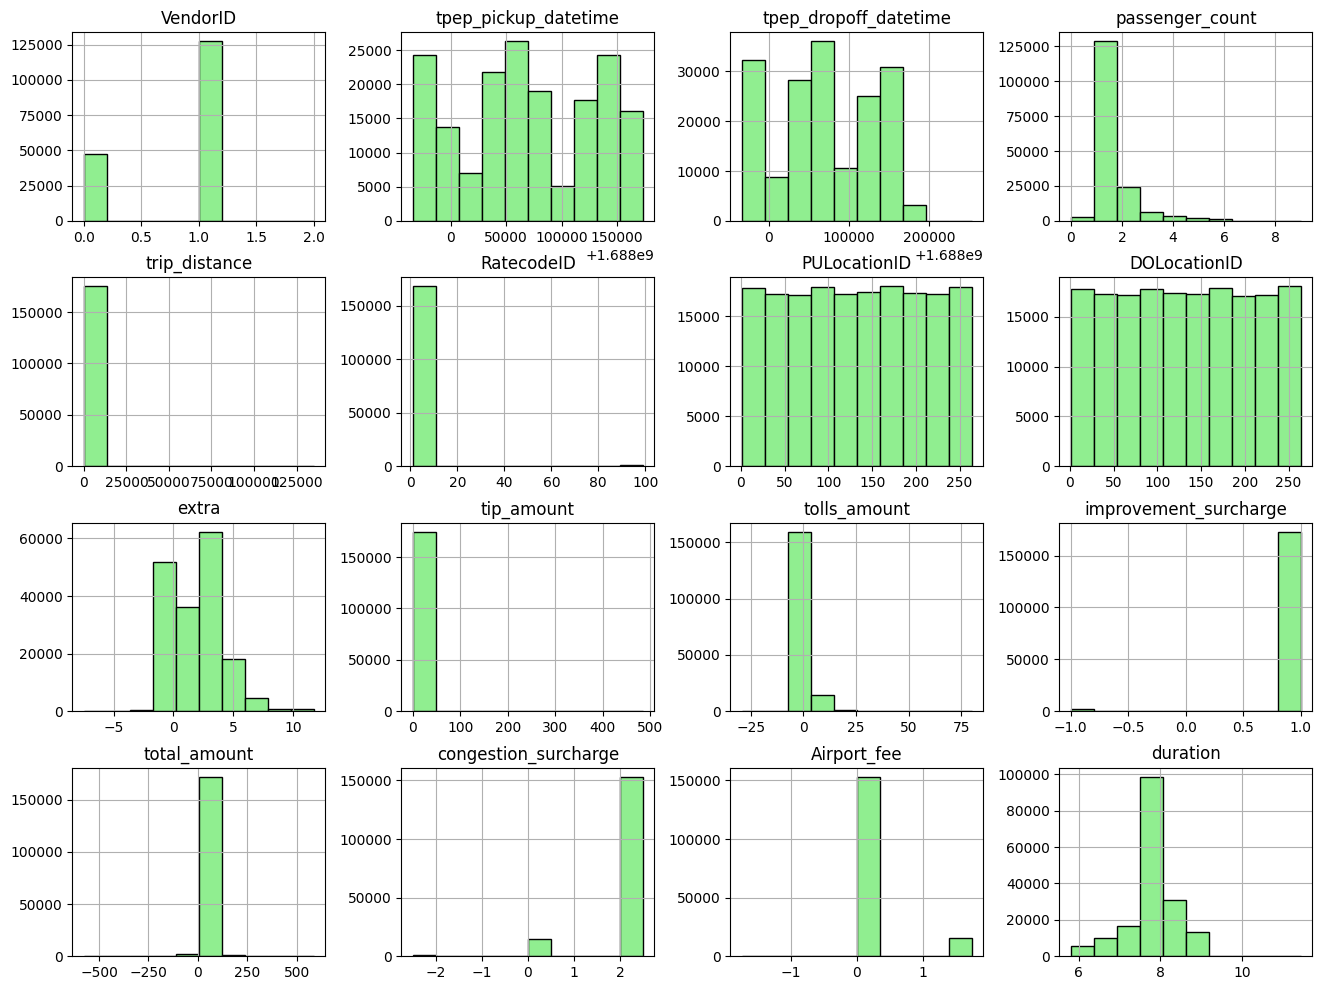

In [348]:
df.hist(figsize = (16,12),color = "lightgreen",edgecolor = "black")

In [349]:
# Splitting the dataset 
from sklearn.model_selection import train_test_split

xtrain,xval,ytrain,yval = train_test_split(df.drop(['total_amount'],axis =1),df['total_amount'],test_size = 0.25,random_state = 100)

In [350]:
print(xtrain.shape,ytrain.shape)
print(xval.shape,yval.shape)

(131249, 17) (131249,)
(43750, 17) (43750,)


In [351]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [352]:
si_median = SimpleImputer(strategy = "median")

##### Imputing the median value in the columns containing null values since median is less sensitive to outliers

In [353]:
for i in ["passenger_count","RatecodeID","congestion_surcharge","Airport_fee"]:
    xtrain[i] = si_median.fit_transform(np.array(xtrain[i]).reshape(-1,1))
    xval[i] = si_median.transform(np.array(xval[i]).reshape(-1,1))

In [354]:
#Using the most frequent value to impute categorical data 

xtrain['store_and_fwd_flag'] = xtrain['store_and_fwd_flag'].replace(np.nan,"N")
xval['store_and_fwd_flag'] = xval['store_and_fwd_flag'].replace(np.nan,"N")

xtrain['store_and_fwd_flag'].isnull().sum()

0

In [355]:
xtrain.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
extra                    0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
congestion_surcharge     0
Airport_fee              0
duration                 0
dtype: int64

In [356]:
xval.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
extra                    0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
congestion_surcharge     0
Airport_fee              0
duration                 0
dtype: int64

In [357]:
xtrain.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,duration
59925,1,1.687994e+09,1.687994e+09,1.0,7.64,1.0,N,78,228,Credit Card,1.00,9.723628,0.0,1.0,0.0,1.75,7.926242
134385,1,1.688029e+09,1.688035e+09,1.0,1.88,1.0,N,135,153,Credit Card,0.00,5.551795,0.0,1.0,2.5,0.00,8.752423
140041,1,1.688153e+09,1.688157e+09,6.0,5.63,1.0,N,145,224,Cash,2.50,1.973251,0.0,1.0,2.5,0.00,8.315811
168157,0,1.687973e+09,1.687977e+09,1.0,2.70,1.0,N,35,69,Credit Card,5.00,6.106305,0.0,1.0,2.5,0.00,8.252185
101452,0,1.688086e+09,1.688082e+09,1.0,8.90,1.0,N,135,212,Credit Card,2.75,11.879317,0.0,1.0,0.0,1.75,7.926242


In [358]:
# transforming train set
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

print(xtrain.columns.groupby(xtrain.dtypes))
numerical_features = ['VendorID', 'PULocationID', 'DOLocationID','tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee','duration']
categorical_features = ['store_and_fwd_flag', 'payment_type']

cols = ColumnTransformer([("cat_trans",OneHotEncoder(),categorical_features)],remainder='passthrough',verbose_feature_names_out=False)

xtrain = cols.fit_transform(xtrain)

{int64: ['VendorID', 'PULocationID', 'DOLocationID'], float64: ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee', 'duration'], object: ['store_and_fwd_flag', 'payment_type']}


In [359]:
xtrain.shape

(131249, 22)

In [360]:
# transforming validation set
xval = cols.transform(xval)

#  Viewing first 5 rows
xval[:5]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.68813682e+09, 1.68814341e+09, 1.00000000e+00, 1.61000000e+00,
        1.00000000e+00, 2.22000000e+02, 7.30000000e+01, 0.00000000e+00,
        3.34087993e+00, 0.00000000e+00, 1.00000000e+00, 2.50000000e+00,
        0.00000000e+00, 8.79346036e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.68799356e+09, 1.68799354e+09, 1.00000000e+00, 1.33000000e+00,
        1.00000000e+00, 1.76000000e+02, 1.94000000e+02, 1.00000000e+00,
        4.81693482e+00, 0.00000000e+00, 1.00000000e+00, 2.50000000e+00,
        0.00000000e+00, 7.92624152e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.68807479e+09, 1.68807273e+09, 2.00000000e+00

### Creating a BaseLine Model

In [361]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV

### Using Linear Regression 

In [362]:
Lin = LinearRegression()

Lin.fit(xtrain,ytrain)
ypred_train = Lin.predict(xtrain)
Lin.score(xtrain,ytrain)

0.7279839374286536

In [363]:
Lin.score(xval,yval)

0.7310461415210956

In [364]:
output = pd.DataFrame({"Model_Name" :"Linear Regression","Train_score" : [Lin.score(xtrain,ytrain)],"Val_score":Lin.score(xval,yval)})

output.head()

,Model_Name,Train_score,Val_score
0,Linear Regression,0.727984,0.731046


### Polynomial Regression

In [365]:
# poly_pipe = Pipeline([
#     ('poly', PolynomialFeatures(degree = 2)),
#     ('Lin', LinearRegression())])

# score = cross_val_score(poly_pipe,xtrain,ytrain,cv = 5,scoring = 'r2')

# score.mean()

In [366]:
# params = {
#     'poly__degree':[1,2,3],
#     'poly__interaction_only': [True, False],
#     'Lin__fit_intercept': [True, False]
# } 

# poly_pipe_cv = GridSearchCV(poly_pipe, param_grid=params,cv=4,scoring='r2')

# poly_pipe_cv.fit(xtrain,ytrain)

In [367]:
# poly_pipe_cv.best_estimator_

In [368]:
# poly_pipe_cv.best_estimator_.fit(xtrain,ytrain)
# print(poly_pipe_cv.best_estimator_.score(xtrain,ytrain))
# poly_pipe_cv.best_estimator_.score(xval,yval)

It even brought down the score from linear regression

### Importing and preprocssing test data

In [369]:
xtest=pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")

# Applying Preprocessing similar to training data

xtest['tpep_pickup_datetime']= pd.to_datetime(xtest['tpep_pickup_datetime'])
xtest['tpep_dropoff_datetime']= pd.to_datetime(xtest['tpep_dropoff_datetime'])


xtest['tpep_pickup_datetime']= xtest['tpep_pickup_datetime'].apply(lambda x: x.timestamp())
xtest['tpep_dropoff_datetime']= xtest['tpep_dropoff_datetime'].apply(lambda x: x.timestamp())

xtest['duration'] = (xtest['tpep_dropoff_datetime'])-(xtest["tpep_pickup_datetime"])
xtest['duration'][xtest['duration']<=332] = median_duration
xtest['duration'] = np.log(xtest['duration'])



/tmp/ipykernel_32/2385914216.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['duration'][xtest['duration']<=332] = median_duration


In [370]:
print(xtest.isnull().sum())

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          1779
trip_distance               0
RatecodeID               1779
store_and_fwd_flag       1779
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     1779
Airport_fee              1779
duration                    0
dtype: int64


In [371]:
# Imputing using SimpleImputer which was fitted in training set
for i in ["passenger_count","RatecodeID","congestion_surcharge","Airport_fee"]:
    xtest[i] = si_median.transform(np.array(xtest[i]).reshape(-1,1))
    
    
#Using the most frequent value to impute 

xtest['store_and_fwd_flag'] = xtest['store_and_fwd_flag'].replace(np.nan,"N")

xtest['store_and_fwd_flag'].isnull().sum()    

0

In [372]:
xtest = cols.transform(xtest)

In [373]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error


In [374]:
# pipe_knn = make_pipeline(KNeighborsRegressor())

#### We check with all the default parameters first to understand how it suits our model and then will tune hyperparameters of KNN algorithm

In [375]:
# pipe_knn.fit(xtrain,ytrain)
# yval_pred = pipe_knn.predict(xval)

In [376]:
# pipe_knn.score(xtrain,ytrain)

0.2724240231615095

In [377]:
# print(r2_score(yval,yval_pred))
# mean_squared_error(yval,yval_pred)

-0.09164146662266504

716.2417539852798

In [378]:
# param = {"n_neighbors":[2,3,4,5,6,8,10],
#          "weights" : ["uniform","distance"],
         
#         }

# gs_knn = GridSearchCV(KNeighborsRegressor(),param_grid = param,cv = 5,scoring = "r2",n_jobs = -1)

# gs_knn.fit(xtrain,ytrain)

In [379]:
# gs_knn.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [380]:
best_knn = KNeighborsRegressor(n_neighbors= 10, weights= 'uniform')

After individually applying different parameters, we get the following scores for training and validation set

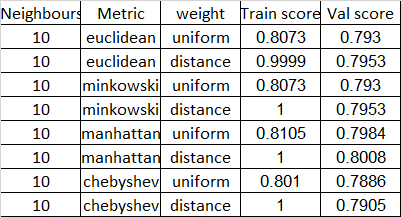

So there is no major difference wrt to distance metric

In [381]:
# best_knn.fit(xtrain,ytrain)

In [382]:
# best_knn.score(xtrain,ytrain)

0.17425535125863356

In [383]:
# yval_pred = best_knn.predict(xval)
# print(r2_score(yval,yval_pred))
# output.loc[len(output)] = {"Model_Name" : "KNeighbors Regressor","Train_score" : best_knn.score(xtrain,ytrain),"Val_score":best_knn.score(xval,yval)}

-0.0038282749252835924

### Using Support Vectors

In [384]:
# from sklearn.decomposition import PCA

In [385]:
# svm = make_pipeline(SVR(kernel = 'linear',C=1))
# svm.fit(xtrain,ytrain.ravel())
# svm.score(xtrain,ytrain)

#### We check with all the most basic implementation of parameters to understand how it suits our model and then will tune parameters

In [386]:
# # grid = {
# #         "C" : [1,0.1,0.001,10]      
# #         }      

# svm_rbf = make_pipeline(SVR(kernel = 'rbf',C = 10))
# svm_rbf.fit(xtrain,ytrain.ravel())
# svm_rbf.score(xtrain,ytrain)

In [387]:
# yval_pred = svm_rbf.predict(xval)
# print(r2_score(yval,yval_pred))

In [388]:
# svm_poly = make_pipeline(SVR(kernel = 'poly', coef0 = 2, C = 10))
# svm_poly.fit(xtrain,ytrain.ravel())
# # svm_poly.score(xtrain,ytrain)

In [389]:
# yval_pred = svm_poly.predict(xval)
# print(r2_score(yval,yval_pred))

Clearly the model is not at all fit for unseen data, case of overfitting !

In [390]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor 

## Using Decision Trees

In [391]:
# dt_reg = DecisionTreeRegressor(random_state = 42)

In [392]:
# param_grid = {'max_depth': range(1, 20),
#               'min_samples_split':range(2,8),
#              'min_samples_leaf':range(1,10)}
# dt_grid_search = GridSearchCV(dt_reg,
#                                  param_grid=param_grid,
#                                  n_jobs=2,
#                                  cv=5,
#                                  scoring="r2",
#                                  return_train_score=True)
# dt_grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=2,
             param_grid={'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 8)},
             return_train_score=True, scoring='r2')

In [393]:
# dt_grid_search.best_params_

{'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 6}

{'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 6}


In [ ]:
dec_tree = DecisionTreeRegressor(random_state = 42,max_depth= 11,min_samples_leaf= 1,min_samples_split= 6)

In [394]:
dt_grid_search.best_estimator_.fit(xtrain,ytrain)
A = dt_grid_search.best_estimator_.score(xtrain,ytrain)
print(A)

0.9587222351178131


0.9587222351178131

In [395]:
B = dt_grid_search.best_estimator_.score(xval,yval)
print(B)
output.loc[len(output)] = {"Model_Name" : "Decision Tree Regressor","Train_score" : A,"Val_score":B}

0.9246684334300707

## Using Random Forest

In [396]:
# ranfr = RandomForestRegressor(random_state = 42)


# grid = {
#     'n_estimators' = [100,150]
#     'max_depth': [3, 5, 7,None],
#     'min_samples_split': [2,4,6,8],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create a GridSearchCV object
# gs_ranfr = GridSearchCV(ranfr, grid, cv=5,scoring = "r2")
# gs_ranfr.fit(xtrain,ytrain)

In [397]:
# gs_ranfr.best_params_

{'n_estimators' : 150,'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [398]:
ranfr = RandomForestRegressor(n_estimators = 150,
                              random_state = 42,
                              max_depth= None,
                              min_samples_leaf= 1,
                              min_samples_split= 2)

In [399]:
ranfr.fit(xtrain,ytrain)
C = ranfr.score(xtrain,ytrain)
print(C)

0.9916331286593227


0.9916331286593227

In [400]:
D = ranfr.score(xval,yval)
print(D)
output.loc[len(output)] = {"Model_Name" : "Random Forest Regressor","Train_score" : C,"Val_score":D}

0.9477907853273698


0.9477907853273698

## Using Bagging Regressor

In [401]:
# Bag_model = BaggingRegressor(random_state = 42)

# tuned_parameters = [{"n_estimators": [10,20,30],
#               "max_features":[1,2,4,6,8],
#               "max_samples": [0.5,0.1],
#             "bootstrap": [True, False]}]

# gs_Bag_model = GridSearchCV(BaggingRegressor(), param_grid=tuned_parameters,cv=5, scoring = 'r2')
# gs_Bag_model.fit(xtrain,ytrain)

In [402]:
# gs_Bag_model.best_params_

{'bootstrap': True, 'max_features': 8, 'max_samples': 0.5, 'n_estimators': 30}


In [403]:
# bagging = BaggingRegressor(bootstrap= True, max_features= 8, max_samples= 0.5, n_estimators= 30,random_state = 42)

In [404]:
# bagging.fit(xtrain,ytrain)
# E = bagging.score(xtrain,ytrain)
# print(E)
# F = bagging.score(xval,yval)
# print(F)

# output.loc[len(output)] = {"Model_Name" : "Bagging Regressor","Train_score" : E,"Val_score":F}

0.931522508134267

0.8462714115759022

## Using Voting Regressor

In [405]:
estimators = [
    ('rfr',RandomForestRegressor(random_state = 42)),
    ("gbr",GradientBoostingRegressor(random_state = 42)),
    ('lr',LinearRegression())
]
voter = VotingRegressor(estimators=estimators,n_jobs = -1)

voter.fit(xtrain,ytrain)

VotingRegressor(estimators=[('rfr', RandomForestRegressor(random_state=42)),
                            ('gbr', GradientBoostingRegressor(random_state=42)),
                            ('lr', LinearRegression())],
                n_jobs=-1)

In [406]:
G = voter.score(xtrain,ytrain)
print(G)
H = voter.score(xval,yval)
print(H)

output.loc[len(output)] = {"Model_Name" : "Voting Regressor","Train_score" : G,"Val_score":H}

0.9404284475174485
0.923653345748505


0.9404284475174485

0.9236533457485051

## Using Multi-Layer Perceptron Regressor

In [407]:
# MLP_clf = MLPRegressor(hidden_layer_sizes = (15,10,5),random_state = 42)


In [408]:
# MLP_clf.fit(xtrain,ytrain)
# print(MLP_clf.score(xtrain,ytrain))
# MLP_clf.score(xval,yval)

-387163.6125403579

-379437.33661632595

In [409]:
# hyperparameter_grid = {
#     'learning_rate_init': [0.01, 0.001, 0.0001],
#     'hidden_layer_sizes': [(10,), (20,)],
#     'activation': ['relu', 'tanh', 'sigmoid']
# }


# grid_search_mlp = GridSearchCV(MLP_clf, hyperparameter_grid, cv=5,scoring= 'r2')
# grid_search_mlp.fit(xtrain,ytrain)

In [410]:
# grid_search_mlp.best_estimator_.fit(xtrain,ytrain)

MLPRegressor(activation='tanh', hidden_layer_sizes=(10,),
             learning_rate_init=0.01, random_state=42)

In [411]:
# I = grid_search_mlp.best_estimator_.score(xtrain,ytrain)
# print(I)

-1.6253337355998099e-06

In [412]:
# J = grid_search_mlp.best_estimator_.score(xval,yval)
# print(J)

# output.loc[len(output)] = {"Model_Name" : "Multi-Layer Perceptron Regressor","Train_score" : I,"Val_score":J}

-0.00010032878594867789

### Finding out the best model among all !!

In [413]:
output.sort_values(by = ["Val_score"], ascending = [False])

,Model_Name,Train_score,Val_score
1,Random Forest Regressor,0.991633,0.947791
2,Voting Regressor,0.940428,0.923653
0,Linear Regression,0.727984,0.731046


| Sr_no | Model_Name | Train_score | Val_score |
|---|---|---|---|
| 3 | Random Forest Regressor | 0.991633 | 0.947790 |
| 2 | Decision Tree Regressor | 0.958722 | 0.924668 |
| 5 | Voting Regressor | 0.940428 | 0.923653 |
| 4 | Bagging Regressor | 0.931522 | 0.846271 |
| 0 | Linear Regression | 0.727983 | 0.731046 |
| 6 | Multi-Layer Perceptron Regressor | -0.000001 | -0.000100 |
| 1 | KNeighbors Regressor | 0.174255 | -0.003828 |


### Clearly Random Forest gives the best result so we will make our final prediction on the test set using Random Forest Regressor best estimator achieved after tuning its hyperparameters !!

In [414]:
ypred = ranfr.predict(xtest)

In [415]:
submission = pd.DataFrame(columns = ["ID","total_amount"])
submission["ID"] = [i for i in range(1,len(ypred)+1)]
submission["total_amount"] = ypred
submission.to_csv('submission.csv',index=False)